In [107]:
import pandas as pd
import numpy as np
swedish_motor_insurance = pd.read_csv("swedish_motor_insurance.csv")

In [108]:
print(swedish_motor_insurance.mean())
#caculate the mean of each column

n_claims             22.904762
total_payment_sek    98.187302
dtype: float64


In [109]:
print(swedish_motor_insurance['n_claims'].corr(swedish_motor_insurance['total_payment_sek']))
#will indicate the strength and direction of the linear relationship

0.9128782350234065


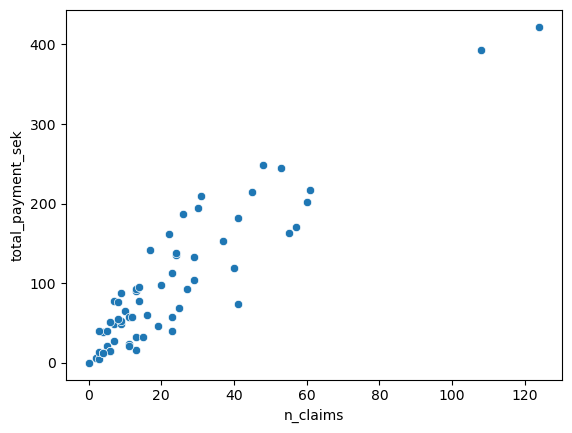

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = "n_claims" , y = "total_payment_sek" , data = swedish_motor_insurance)
plt.show()

#x is explanatory variables (use to predict y)
#y is response variable. (predict this)

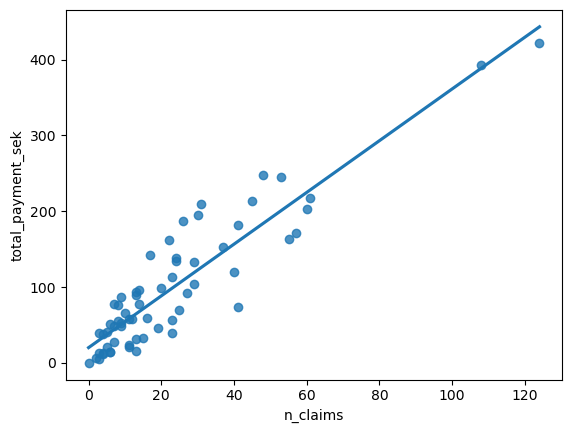

In [111]:
sns.regplot(x = "n_claims", y = "total_payment_sek" , data = swedish_motor_insurance , ci = None)
plt.show()
#ci stands for "confidence interval." Confidence intervals
#are used to estimate the range within which a population 
#parameter

#ci = None omit the condicence interval ribbon

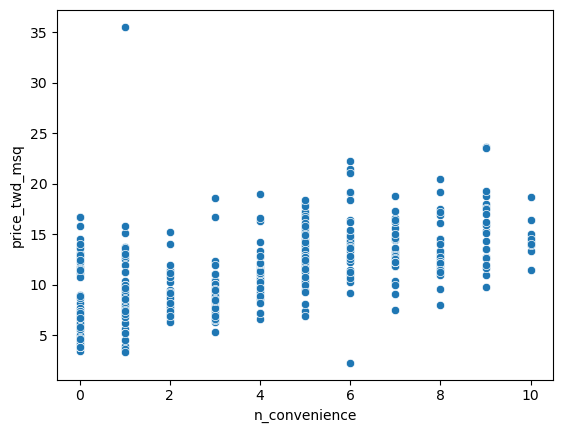

In [112]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
sns.scatterplot(x = "n_convenience" , y = "price_twd_msq" , data = taiwan_real_estate)
plt.show()

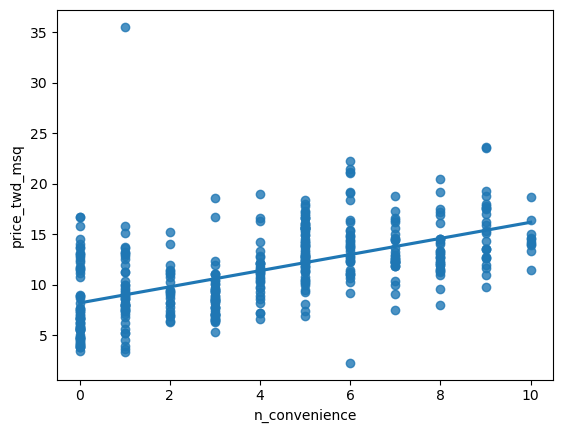

In [113]:
sns.regplot(x = "n_convenience" , y = "price_twd_msq" , data = taiwan_real_estate, ci = None)
plt.show()

# RUNNING A MODEL 

In [114]:
from statsmodels.formula.api import ols

#creates a linear regression model
# specifies that you want to model the 'total_payment_sek' variable as a linear function of the 'n_claims' variable
# dependent variable / Response variable ('total_payment_sek') and 
#the independent variable / Explanatory variable('n_claims')
mdl_payment_vs_claims = ols("total_payment_sek ~ n_claims", data = swedish_motor_insurance)

#calculates the coefficients (parameters) of the model 
#that best describe the relationship between 'total_payment_sek' and 'n_claims'.
mdl_payment_vs_claims = mdl_payment_vs_claims.fit()

# prints the intercept and the coefficient for the 
#'n_claims' variable. These coefficients represent the 
#intercept and the slope of the regression line
print(mdl_payment_vs_claims.params)

Intercept    19.994486
n_claims      3.413824
dtype: float64


In [115]:
#Interpreting the model coefficients
#Equation
#total_payment_sek = 19.99 + 3.14 * n_claims

In [116]:
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience' , data = taiwan_real_estate)
mdl_price_vs_conv = mdl_price_vs_conv.fit()
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


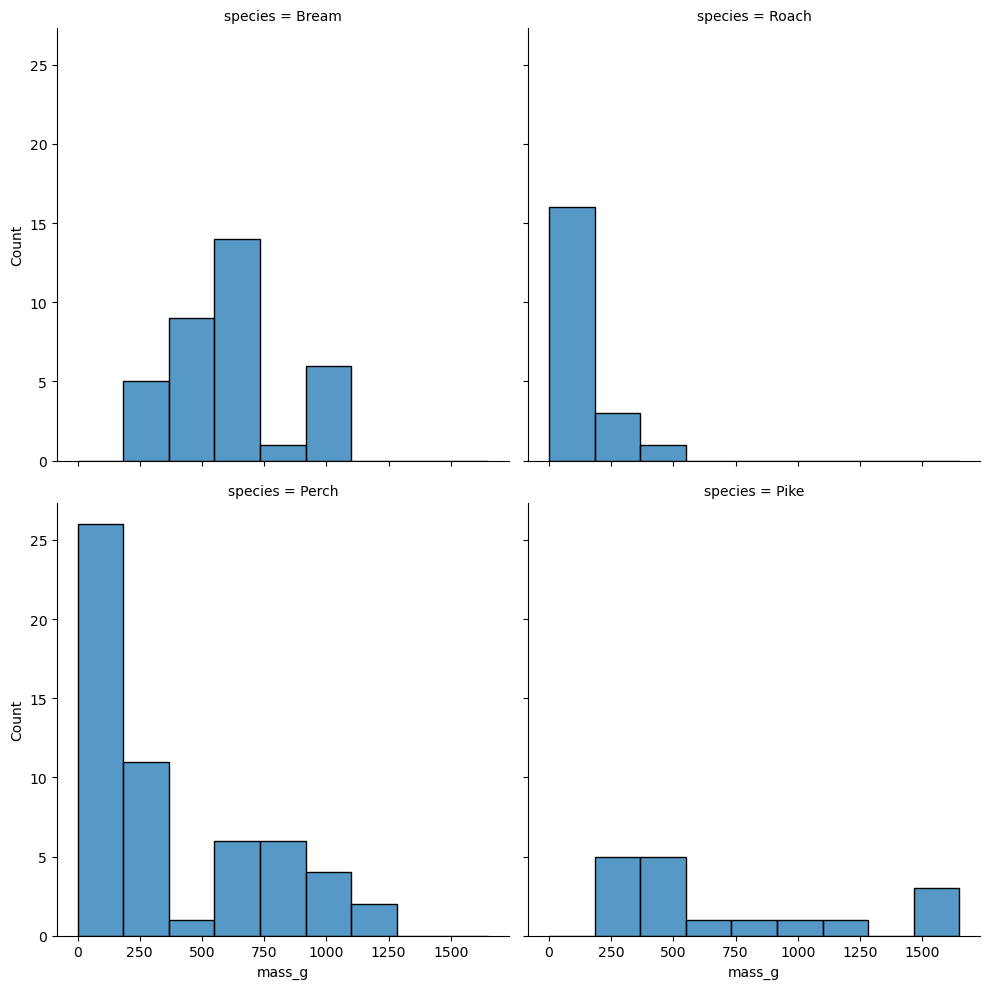

In [117]:
# create a distribution plot (displot) 
#used to visualize the distribution of a single variable
# visualizing the distribution of the "mass_g" variable
#creating separate distribution plots for each unique value of the "species" variable.

fish = pd.read_csv("fish.csv")

#col="species": Separates the data into different columns 
#based on the unique values in the "species" column. 
#Each unique species will have its own distribution plot.
sns.displot(data = fish, x = "mass_g", col = "species" , col_wrap = 2 , bins = 9)
plt.show()

# SUMMARY STATISTICS: MEAN MASS BY SPECIES

In [118]:
#group by "species" with "mass_g"'s mean'
summary_stats = fish.groupby("species")["mass_g"].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [119]:
from statsmodels.formula.api import ols
mdl_mass_vs_species = ols("mass_g ~ species", data = fish).fit()
print(mdl_mass_vs_species.params)

#Error here is the "value" for Intercept is actually "Bream"'s mean mass

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [120]:
mdl_mass_vs_species = ols("mass_g ~ species + 0", data = fish).fit()
print(mdl_mass_vs_species.params)
#Model without and intercept
#IN case of a single, categorical variable, coefficients are the means

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


# VISUALIZING NUMERIC VS CATEGORICAL

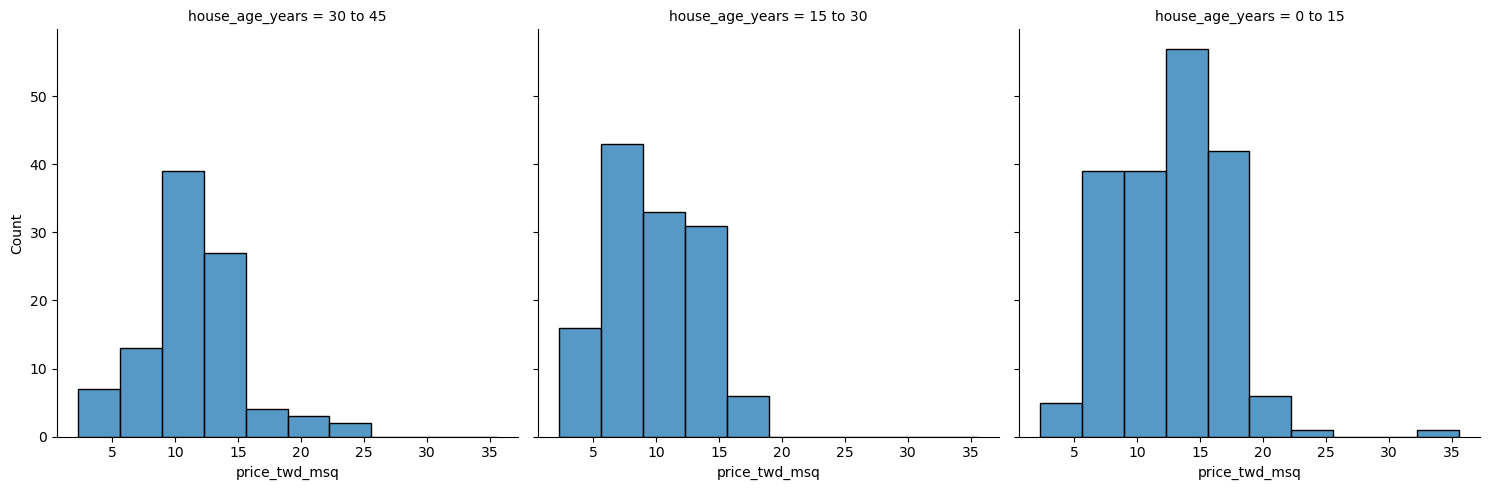

In [121]:
sns.displot(data = taiwan_real_estate, x = "price_twd_msq", col = 'house_age_years' ,col_wrap = 3 , bins = 10)
plt.show()

In [122]:
summary_stat = taiwan_real_estate.groupby('house_age_years')["price_twd_msq"].mean()
print(summary_stat)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [123]:
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data = taiwan_real_estate).fit()
print(mdl_price_vs_age.params)
#coefficients represent the 
#intercept and the slope of the regression line

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [124]:
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years + 0', data = taiwan_real_estate).fit()
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [125]:
bream = fish[fish["species"] == "Bream"]
print(bream.head())

  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


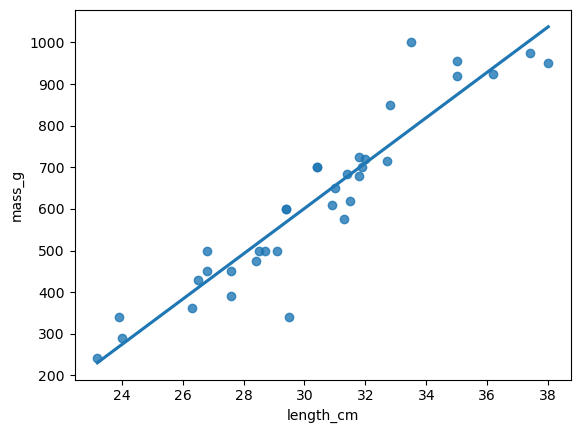

In [126]:
sns.regplot(x = "length_cm" , y = "mass_g" , data = bream, ci = None)
plt.show()

In [127]:
mdl_mass_vs_length = ols("mass_g ~ length_cm" , data = bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [128]:
#contains a sequence of values in the "length_cm" column, 
#ranging from 20 to 40.

# can be used as explanatory data for further analysis or 
#for making predictions based on a previously fitted regression mode
explanatory_data = pd.DataFrame({'length_cm': np.arange(20,41)})
print(explanatory_data)

    length_cm
0          20
1          21
2          22
3          23
4          24
5          25
6          26
7          27
8          28
9          29
10         30
11         31
12         32
13         33
14         34
15         35
16         36
17         37
18         38
19         39
20         40


call predict on the model passing DataFrame of explanatory variable
predict functions return a series of predictions one for each row of the explanatory data

predicted values for the "mass_g" variable based on the values of the "length_cm" variable contained in the explanatory_data DataFrame. Each value in the output represents the model's prediction for "mass_g" given a specific "length_cm" value.

s predicting the mass of fish (in grams, denoted as "mass_g") based on the length of the fish (in centimeters, denoted as "length_cm").

In [129]:
print(mdl_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [130]:
#PRINT THE PREDICTING DATA ALONGSIDE WITH EXPLANATZORY DATA
explanatory_data = pd.DataFrame({'length_cm': np.arange(20,41)})
prediction_data = explanatory_data.assign(mass_g = mdl_mass_vs_length.predict(explanatory_data))
print(prediction_data)

    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


# SHOWING PREDICTZION

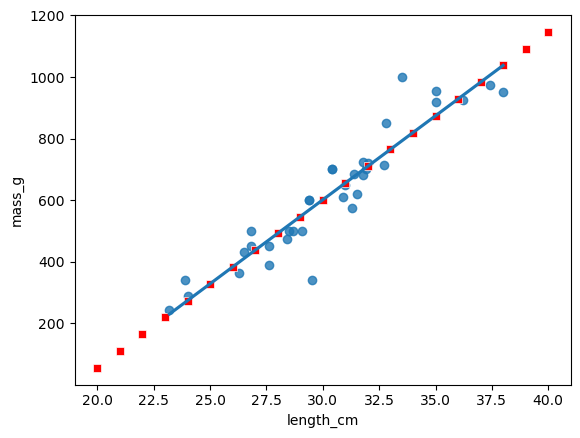

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
sns.regplot(x = "length_cm" , y = "mass_g" , ci = None , data = bream)
sns.scatterplot(x = "length_cm", y = "mass_g" , data = prediction_data, color = "red", marker = "s")
plt.show()

# EXTRAPOLATING

means making predictions outside the range of observed data.

In [135]:
little_bream = pd.DataFrame({"length_cm": [10]})
pred_little_bream = little_bream.assign(mass_g = mdl_mass_vs_length.predict(little_bream))
print(pred_little_bream)

   length_cm      mass_g
0         10 -489.847756


In [136]:
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [137]:
price_twd_msq = explanatory_data.assign(price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))
print(price_twd_msq)


    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


FITTED VALUES: PREDICTIONS ON THE ORIGINAL DATASET

In [138]:
print(mdl_mass_vs_length.fittedvalues)

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


In [139]:
explanatory_data = bream["length_cm"]
print(mdl_mass_vs_length.predict(explanatory_data))

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


RESIDUALS: ACTUAL RESPONSE VALUES MINUS PREDICTED RESPONSES VALUES

"Residuals" are a measure of inaccuracy in the model fit, and are accessed with the .resid attribute. Like fitted values, there is one residual for each row of the dataset. Each residual is the actual response value minus the predicted response value. In this case, the residuals are the masses of breams, minus the fitted values. Here we illustrated the residuals as red lines on the regression plot. Each vertical line represents a single residual.

In [140]:
print(mdl_mass_vs_length.resid)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [141]:
print(bream["mass_g"] - mdl_mass_vs_length.fittedvalues)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


# MY WAY

In [142]:
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

#coefficient/ parameters
coeffs = mdl_price_vs_conv.params
intercept = coeffs['Intercept']
slope = coeffs['n_convenience']
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


# TEACHER WAYS

In [143]:

coeffs = mdl_price_vs_conv.params 
intercept = coeffs[0]
slope = coeffs[1]
# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data 
print(price_twd_msq)
# Compare to the results from .predict() 
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


# PLOTTING MASS VS LENGTH CUBED

   species  mass_g  length_cm
55   Perch     5.9        7.5
56   Perch    32.0       12.5
57   Perch    40.0       13.8
58   Perch    51.5       15.0
59   Perch    70.0       15.7
60   Perch   100.0       16.2
61   Perch    78.0       16.8
62   Perch    80.0       17.2
63   Perch    85.0       17.8
64   Perch    85.0       18.2


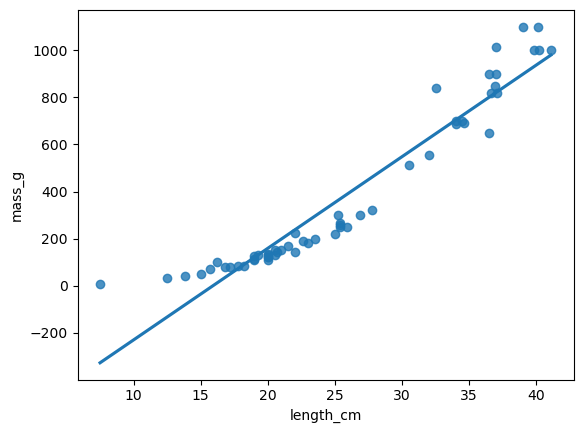

In [164]:
perch = fish[fish['species'] == 'Perch']
print(perch.head(10))
sns.regplot(x='length_cm', y = 'mass_g', data = perch, ci=None)
plt.show()

# Under The data points fit the line much better now, so we're ready to run a model.

55       421.875
56      1953.125
57      2628.072
58      3375.000
59      3869.893
60      4251.528
61      4741.632
62      5088.448
63      5639.752
64      6028.568
65      6859.000
66      6859.000
67      6859.000
68      7189.057
69      8000.000
70      8000.000
71      8000.000
72      8000.000
73      8000.000
74      8615.125
75      8615.125
76      8869.743
77      9261.000
78      9938.375
79     10648.000
80     10648.000
81     11543.176
82     12167.000
83     12977.875
84     15625.000
85     16003.008
86     16387.064
87     16387.064
88     16387.064
89     17373.979
90     19465.109
91     21484.952
92     28372.625
93     32768.000
94     34328.125
95     39304.000
96     39304.000
97     41063.625
98     41421.736
99     48627.125
100    48627.125
101    49027.896
102    50243.409
103    50653.000
104    50653.000
105    51064.811
106    59319.000
107    63044.792
108    64481.201
109    64964.808
110    69426.531
Name: length_cm_cubed, dtype: float64


/var/folders/4j/bnvctt7152z6l5l6szd4m7wh0000gn/T/ipykernel_48735/3517991639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch['length_cm_cubed'] = perch['length_cm']**3


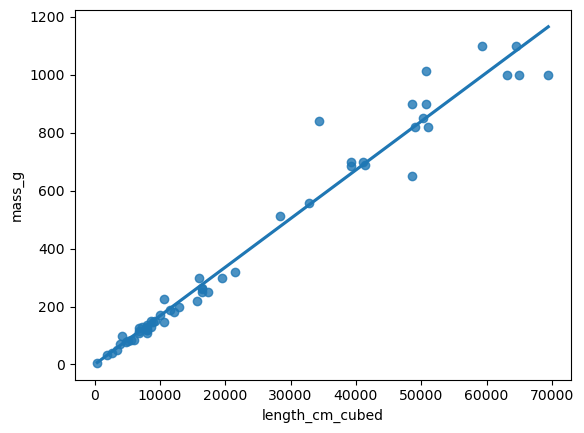

In [165]:
perch['length_cm_cubed'] = perch['length_cm']**3
sns.regplot(x = "length_cm_cubed" , y = "mass_g" , data = perch , ci = None)
print(perch['length_cm_cubed'])
plt.show()

To model this transformation, we replace the original length variable with the cubed length variable. We then fit the model and extract its coefficients.

In [166]:
mdl_perch = ols("mass_g ~ length_cm_cubed" , data = perch).fit()
mdl_perch.params

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64

# PREDICTING MASS VS LENGTH CUBED

In [168]:
explanatory_data = pd.DataFrame({"length_cm_cubed": np.arange(10,41,5) ** 3, "length_cm": np.arange(10,41,5)})
print(explanatory_data)

   length_cm_cubed  length_cm
0             1000         10
1             3375         15
2             8000         20
3            15625         25
4            27000         30
5            42875         35
6            64000         40


 create the explanatory DataFrame in the same way as usual. Notice that you specify the lengths cubed. We can also add the untransformed lengths column for reference. The code for adding predictions is the same assign and predict combination as you've seen before.

In [170]:
prediction_data = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data))
print(prediction_data)

   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


# PLOTTING MASS VS LENGTH CUBED

sns.regplot:

sns.regplot is primarily used for creating scatterplots with a regression line (hence the "reg" in the name).
It not only displays the individual data points but also fits a regression line to represent the overall trend or relationship between the variables.
The regression line helps you understand the linear relationship between the two variables and provides insight into how one variable changes as the other variable changes.
It's useful when you want to visualize and quantify the linear association between variables.
sns.scatterplot:

sns.scatterplot is more focused on displaying individual data points as they are, without fitting a regression line.
It is versatile and can be used for general scatterplot purposes, including comparing individual data points, identifying clusters or patterns, and visualizing relationships without imposing a specific model (such as linear regression).
It provides more flexibility in customizing the appearance of data points, such as marker style, size, and color.
In your code, you are using sns.regplot to create a scatterplot with a regression line (reg) to visualize the relationship between "length_cm_cubed" and "mass_g" for the "perch" dataset. This will show the individual data points as well as a regression line representing the linear trend.

You are also using sns.scatterplot to overlay prediction data (prediction_data) on the same plot. This allows you to visualize how the predictions compare to the original data points. sns.scatterplot is suitable for this purpose because it displays data points without fitting a regression line.

In summary, the key difference is that sns.regplot emphasizes the linear relationship with a regression line, while sns.scatterplot is more general and suitable for displaying individual data points and making comparisons without fitting a specific model. The choice between them depends on your visualization goals and whether you want to emphasize a linear trend.

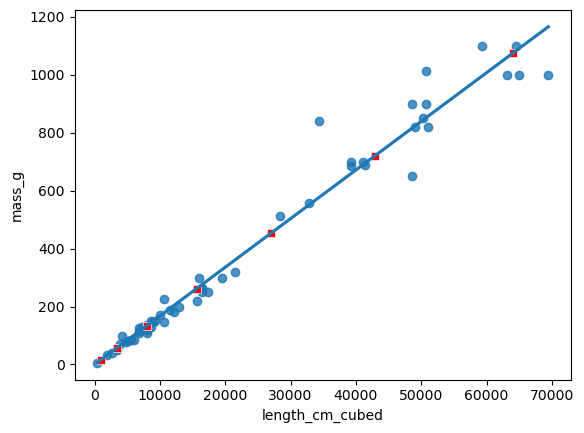

In [175]:
fig = plt.figure()
sns.regplot(x="length_cm_cubed" , y = "mass_g" , data = perch , ci = None)
sns.scatterplot(data = prediction_data, x = "length_cm_cubed" , y = "mass_g", color = "red" , marker = "s")
plt.show()

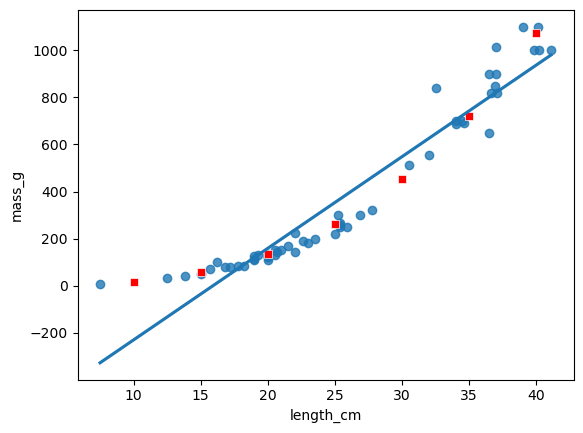

In [176]:
fig = plt.figure()
sns.regplot(x = "length_cm" , y = "mass_g" , data = perch , ci = None)
sns.scatterplot(data = prediction_data , x = "length_cm" , y = "mass_g", color = "red" , marker = "s")
plt.show()

# EXERCISE

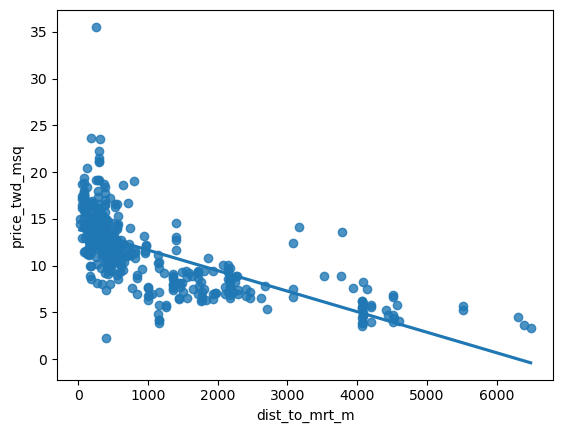

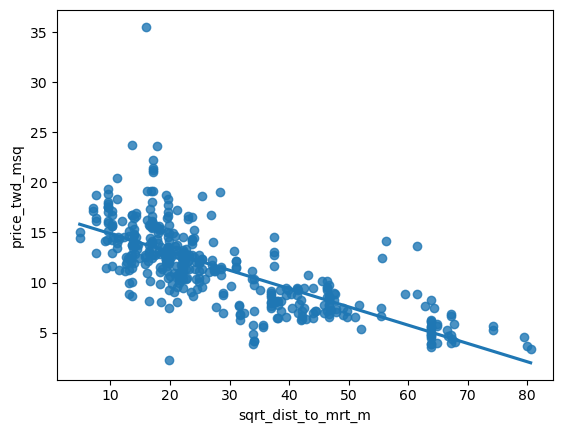

0       9.212970
1      17.509846
2      23.706212
3      23.706212
4      19.762803
         ...    
409    63.890649
410     9.510839
411    19.772951
412    10.237680
413     9.510839
Name: sqrt_dist_to_mrt_m, Length: 414, dtype: float64

In [191]:
sns.regplot(x = "dist_to_mrt_m" , y = "price_twd_msq" , data =taiwan_real_estate , ci = None )

taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])
plt.figure()
sns.regplot(x = "sqrt_dist_to_mrt_m", y = "price_twd_msq" , data =taiwan_real_estate,ci = None)
plt.show()
taiwan_real_estate["sqrt_dist_to_mrt_m"]

In [192]:
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [194]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0,81,10) ** 2), "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_dist.predict(explanatory_data))
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


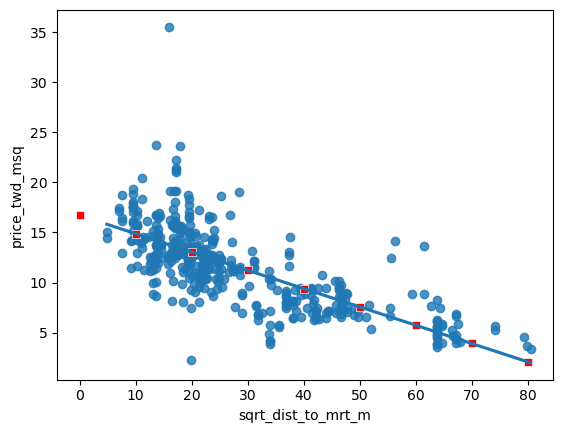

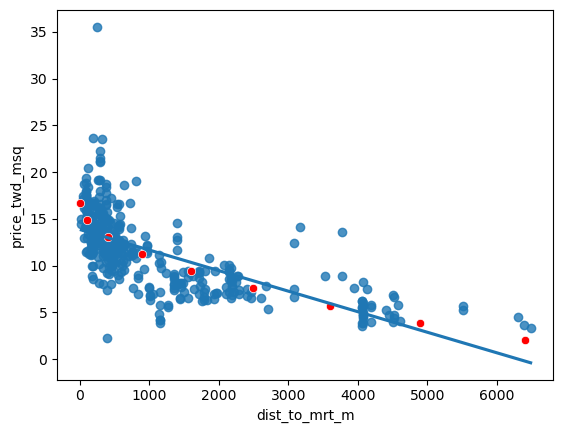

In [200]:
fig = plt.figure()
sns.regplot(x = "sqrt_dist_to_mrt_m" , y = "price_twd_msq" , data = taiwan_real_estate , ci = None)
sns.scatterplot(x = "sqrt_dist_to_mrt_m" , y = "price_twd_msq" , data = prediction_data, color = 'red' , marker = "s")
plt.show()
sns.regplot(x = "dist_to_mrt_m" , y = "price_twd_msq" , data = taiwan_real_estate, ci = None)
sns.scatterplot(x = "dist_to_mrt_m" , y = "price_twd_msq" , data = prediction_data, color = 'red')
plt.show()

# QUANTIFYING MODEL FIT 

In [201]:
mdl_bream = ols("mass_g ~ length_cm" , data = bream).fit()
print(mdl_bream.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.22e-16
Time:                        19:30:09   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

# .rsquared attribute

In [203]:
print(mdl_bream.rsquared)

0.8780627095147175


# .mse_resid attribute


In [205]:
mse = mdl_bream.mse_resid
print('mse: ', mse)

mse:  5498.555084973519


In [206]:
rse = np.sqrt(mse)
print("rse: ", rse)

rse:  74.15224261594196
